In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_seeds = np.array([(0,0), (1,0), (0,1), (1,1)])
y_seeds = np.array([0, 1, 1, 0])

In [3]:
N = 1000
idxs = np.random.randint(0, 4, N)

In [4]:
X = x_seeds[idxs]
Y = y_seeds[idxs]

In [5]:
X = X + np.random.normal(scale = 0.25, size=X.shape)

In [6]:
idxs_1 = np.where(Y==1)
idxs_0 = np.where(Y==0)

In [7]:
X_0 = X[idxs_0]
Y_0 = Y[idxs_0]

In [8]:
X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

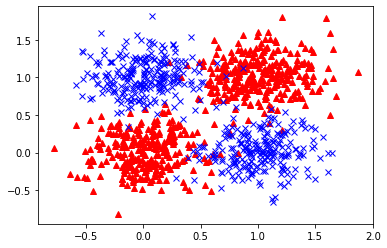

In [9]:
plt.plot(X_0[:, 0], X_0[:, 1], "r^")
plt.plot(X_1[:, 0], X_1[:, 1], "bx")
plt.show()

In [10]:
class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens
        
        self.W1 = np.random.normal(size = (num_hiddens, num_input_features))
        self.b1 = np.random.normal(size = num_hiddens)
        self.W2 = np.random.normal(size = num_hiddens)
        self.b2 = np.random.normal(size = 1)
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
        
    def predict(self, x):
        z1 = np.matmul(self.W1, x) + self.b1
        a1 = np.tanh(z1)
        z2 = np.matmul(self.W2, a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1, a1, z2, a2)

In [11]:
model = shallow_neural_network(2, 3)

In [12]:
def train(X, Y, model, lr=0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)
    m = len(X)
    cost = 0.0
    
    for x, y in zip(X, Y):
        
        a2, (z1, a1, z2, _) = model.predict(x)
        
        if y==1:
            cost -= np.log(a2)
        else:
            cost -= np.log(1-a2)
        
        diff = a2-y
        
        db2 += diff
        dW2 += a1*diff

        tmp = (1-a1**2)*model.W2*diff
        db1 += tmp
        dW1 += np.outer(tmp,x)
        
    cost/=m
    model.W1 -= lr*(dW1/m)
    model.b1 -= lr*(db1/m)
    model.W2 -= lr*(dW2/m)
    model.b2 -= lr*(db2/m)
        
    return cost

In [13]:
for epoch in range(100):
    cost = train(X, Y, model, 1.0)
    if epoch%10==0:
        print(epoch, cost)

0 [0.96416294]
10 [0.58144958]
20 [0.47938902]
30 [0.37998344]
40 [0.31586728]
50 [0.27513245]
60 [0.24758155]
70 [0.2279297]
80 [0.21333032]
90 [0.20215729]


In [14]:
model.predict((1,1))[0].item()

0.06662069028642019

In [15]:
model.predict((1,0))[0].item()

0.9451158309430713

In [16]:
model.predict((0,1))[0].item()

0.9505031009073573

In [17]:
model.predict((0,0))[0].item()

0.013761883804509953